<a href="https://colab.research.google.com/github/dorizx/ml_HousePricePredict/blob/main/assalamualaikumML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE ANALYSIS FOR PREDICTION**

## **DATA UNDERSTANDING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_aug24 = pd.read_csv("https://raw.githubusercontent.com/dorizx/ml_HousePricePredict/main/data/rumah/raw_aug24.csv")
raw_aug24['year-month-sales'] = '2024-08'

In [3]:
raw_sep24 = pd.read_csv("https://raw.githubusercontent.com/dorizx/ml_HousePricePredict/main/data/rumah/raw_sep24.csv")
raw_sep24['year-month-sales'] = '2024-09'

In [4]:
raw_oct24 = pd.read_csv("https://raw.githubusercontent.com/dorizx/ml_HousePricePredict/main/data/rumah/raw_oct24.csv")
raw_oct24['year-month-sales'] = '2024-10'

In [5]:
raw_nov24 = pd.read_csv("https://raw.githubusercontent.com/dorizx/ml_HousePricePredict/main/data/rumah/raw_nov24.csv")
raw_nov24['year-month-sales'] = '2024-11'

In [6]:
raw_dec24 = pd.read_csv("https://raw.githubusercontent.com/dorizx/ml_HousePricePredict/main/data/rumah/raw_dec24.csv")
raw_dec24['year-month-sales'] = '2024-12'

In [7]:
raw_jan25 = pd.read_csv("https://raw.githubusercontent.com/dorizx/ml_HousePricePredict/main/data/rumah/raw_jan25.csv")
raw_jan25['year-month-sales'] = '2025-01'

In [8]:
df1 = raw_aug24
df2 = raw_sep24
df3 = raw_oct24
df4 = raw_nov24
df5 = raw_dec24
df6 = raw_jan25

combined_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
combined_df.head(10)

,Unnamed: 0,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building,year-month-sales
0,0,"Rp 1,6 Miliar",Cicilan: 5 Jutaan per bulan,"Full furnish, bawa koper aja Rumah di Kota bar...","Kota Baru Parahyangan, Bandung",2,1,1,LT : 72 m²,LB : 50 m²,2024-08
1,1,Rp 850 Juta,Cicilan: 3 Jutaan per bulan,"Rumah Baru Unfurnished SHM di Sariwangi, Bandung","Sariwangi, Bandung",2,1,1,LT : 70 m²,LB : 80 m²,2024-08
2,2,Rp 875 Juta,Cicilan: 3 Jutaan per bulan,"New Scandinavian 2lt Kiara Sari Asri, dkt Sams...","Buah Batu, Bandung",3,2,1,LT : 60 m²,LB : 70 m²,2024-08
3,3,"Rp 1,75 Miliar",Cicilan: 6 Jutaan per bulan,Rumah View Danau di Podomoro Park Bandung,"Podomoro Park Bandung, Bandung",2,3,1,LT : 90 m²,LB : 94 m²,2024-08
4,4,"Rp 4,9 Miliar",Cicilan: 18 Jutaan per bulan,Rumah Baru Lux Cantik di Singgasana Pradana Lo...,"Singgasana, Bandung",4,4,0,LT : 200 m²,LB : 300 m²,2024-08
5,5,"Rp 5,2 Miliar",Cicilan: 19 Jutaan per bulan,Rumah Cantik Terbaru di Summarecon Bandung Clu...,"Summarecon Bandung, Bandung",3,3,0,LT : 240 m²,LB : 169 m²,2024-08
6,6,"Rp 2,45 Miliar",Cicilan: 9 Jutaan per bulan,Rumah Baru Turangga Sayap Karawitan Kota Bandu...,"Turangga, Bandung",4,3,1,LT : 100 m²,LB : 170 m²,2024-08
7,7,Rp 650 Juta,Cicilan: 2 Jutaan per bulan,Rumah minimalis paling laris di margahayu deka...,"Ciwastra, Bandung",2,1,1,LT : 72 m²,LB : 50 m²,2024-08
8,8,"Rp 1,25 Miliar",Cicilan: 4 Jutaan per bulan,Dijual Rumah Townhouse dekat Golf Timur Arcama...,No Data,3,2,1,LT : 115 m²,LB : 120 m²,2024-08
9,9,Rp 12 Miliar,Cicilan: 44 Jutaan per bulan,Dijual Cepat Rumah Induk+kosn Aktif 23 Kamar d...,"Tubagus Ismail, Bandung",27,27,10,LT : 730 m²,LB : 600 m²,2024-08


In [9]:
def assessing_data(df):
    print(f"\n---TABLE INFO---\n")
    df.info()

    print(f"\n---MISSING VALUES---\n")
    print(df.isna().sum())

    print(f"\n---DUPLICATE DATA---\n")
    print(df.duplicated().sum())

    print(f"\n---STATISTICS PARAMETER---\n")
    print(df.describe())

In [10]:
assessing_data(combined_df)


---TABLE INFO---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109609 entries, 0 to 109608
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        109609 non-null  int64 
 1   Price             109609 non-null  object
 2   Installment       109609 non-null  object
 3   Description       109606 non-null  object
 4   Location          109609 non-null  object
 5   Bedroom           109609 non-null  int64 
 6   Bathroom          109609 non-null  int64 
 7   Carport           109609 non-null  int64 
 8   Land              109609 non-null  object
 9   Building          109609 non-null  object
 10  year-month-sales  109609 non-null  object
dtypes: int64(4), object(7)
memory usage: 9.2+ MB

---MISSING VALUES---

Unnamed: 0          0
Price               0
Installment         0
Description         3
Location            0
Bedroom             0
Bathroom            0
Carport             0
Land      

## **DATA PREPROCESSING**

### **DATA CLEANING**

In [11]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [12]:
def preprocess_data(df):

    # Hapus kolom tidak dibutuhkan
    df = df.drop(['Unnamed: 0', 'Installment', 'Description'], axis=1)

    # Rename kolom
    df.rename(columns={
        'Price': 'harga',
        'Location': 'lokasi',
        'Bedroom': 'kamar_tidur',
        'Bathroom': 'kamar_mandi',
        'Carport': 'garasi',
        'Land': 'luas_tanah',
        'Building': 'luas_bangunan',
        'year-month-sales': 'waktu_penjualan'
    }, inplace=True)

    # Pembersihan nama lokasi
    def clean_lokasi(val):
        if not isinstance(val, str) or val.strip().lower() in ["no data", "n/a", "-", ""]:
            return "No Data"

        val = val.strip().lower().replace(" ,", ",").replace(", ", ",")
        parts = list(dict.fromkeys(val.split(',')))
        parts = [p.strip().title() for p in parts]

        if "Bandung" in parts:
            parts = [p for p in parts if p != "Bandung"]
            return f"{parts[0]}, Bandung" if parts else "Bandung"

        return f"{parts[0]}, Bandung"

    df['lokasi'] = df['lokasi'].apply(clean_lokasi)

    lokasi_terbanyak = df['lokasi'].value_counts().drop(labels=['No Data'], errors='ignore').idxmax()
    df['lokasi'] = df['lokasi'].replace('No Data', lokasi_terbanyak)

    # Konversi harga
    def convert_price(x):
        if isinstance(x, str):
            x = x.replace('Rp', '').replace(',', '.').replace(' ', '')
            x = x.replace('Juta', 'e6').replace('Miliar', 'e9')
            try:
                return eval(x)
            except:
                return None
        return x if isinstance(x, (int)) else None

    df['harga'] = df['harga'].apply(convert_price)

    # Konversi kolom waktu penjualan ke datetime
    df['waktu_penjualan'] = pd.to_datetime(df['waktu_penjualan'], format='%Y-%m', errors='coerce')

    # Ekstrak luas tanah dan bangunan
    df['luas_tanah'] = df['luas_tanah'].astype(str).str.extract(r'(\d+\.?\d*)').astype(int)
    df['luas_bangunan'] = df['luas_bangunan'].astype(str).str.extract(r'(\d+\.?\d*)').astype(int)

    # Imputasi numerik
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        if df[col].isnull().all():
            df[col] = 0
        else:
            df[col].fillna(df[col].median(), inplace=True)

    # Hapus outlier dengan IQR untuk kolom-kolom penting
    columns_to_check = ['harga', 'kamar_tidur', 'kamar_mandi',
                        'garasi', 'luas_tanah', 'luas_bangunan']
    for column in columns_to_check:
        df = remove_outliers(df, column)

    # Hapus duplikat setelah semua proses pembersihan
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [13]:
clean_df = preprocess_data(combined_df)
clean_df.head(10)

<ipython-input-12-399945799>:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,harga,lokasi,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,waktu_penjualan
0,1.600000e+09,"Kota Baru Parahyangan, Bandung",2,1,1,72,50,2024-08-01
1,8.500000e+08,"Sariwangi, Bandung",2,1,1,70,80,2024-08-01
2,8.750000e+08,"Buah Batu, Bandung",3,2,1,60,70,2024-08-01
3,1.750000e+09,"Podomoro Park Bandung, Bandung",2,3,1,90,94,2024-08-01
4,4.900000e+09,"Singgasana, Bandung",4,4,0,200,300,2024-08-01
5,5.200000e+09,"Summarecon Bandung, Bandung",3,3,0,240,169,2024-08-01
6,2.450000e+09,"Turangga, Bandung",4,3,1,100,170,2024-08-01
7,6.500000e+08,"Ciwastra, Bandung",2,1,1,72,50,2024-08-01
8,1.250000e+09,"Kota Baru Parahyangan, Bandung",3,2,1,115,120,2024-08-01
9,4.300000e+09,"Mekar Wangi, Bandung",4,3,2,200,235,2024-08-01


In [14]:
assessing_data(clean_df)


---TABLE INFO---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57190 entries, 0 to 57189
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   harga            57190 non-null  float64       
 1   lokasi           57190 non-null  object        
 2   kamar_tidur      57190 non-null  int64         
 3   kamar_mandi      57190 non-null  int64         
 4   garasi           57190 non-null  int64         
 5   luas_tanah       57190 non-null  int64         
 6   luas_bangunan    57190 non-null  int64         
 7   waktu_penjualan  57190 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.5+ MB

---MISSING VALUES---

harga              0
lokasi             0
kamar_tidur        0
kamar_mandi        0
garasi             0
luas_tanah         0
luas_bangunan      0
waktu_penjualan    0
dtype: int64

---DUPLICATE DATA---

0

---STATISTICS PARAMETER---

    

### **EXPLORATORY DATA ANALYSIS (EDA)**

#### **Tren Rumah Setiap Bulan**

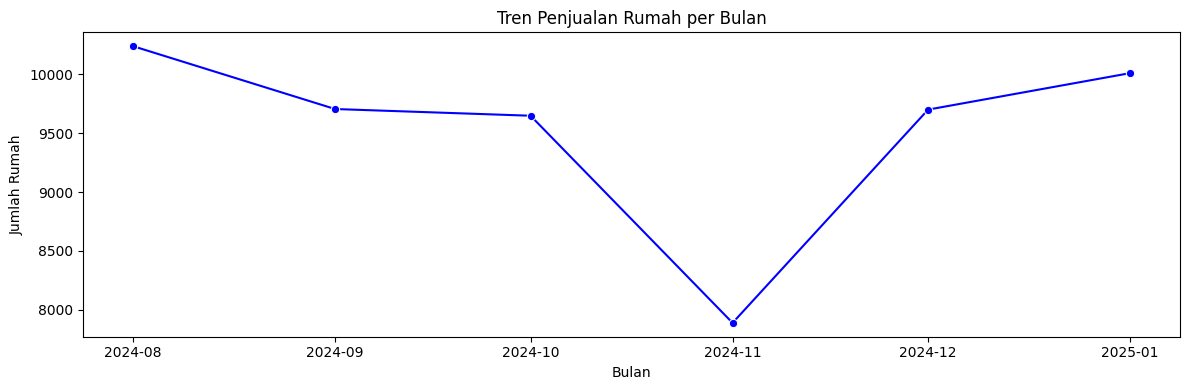

In [15]:
# Tren penjualan rumah

trend_bulanan = (
    clean_df.groupby(clean_df['waktu_penjualan'].dt.to_period('M'))
    .size()
    .reset_index(name='jumlah_rumah')
)
trend_bulanan['waktu_penjualan'] = trend_bulanan['waktu_penjualan'].dt.to_timestamp()

plt.figure(figsize=(12, 4))
sns.lineplot(data=trend_bulanan, x='waktu_penjualan', y='jumlah_rumah', marker='o', color='blue')
plt.title('Tren Penjualan Rumah per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rumah')
plt.tight_layout()
plt.show()

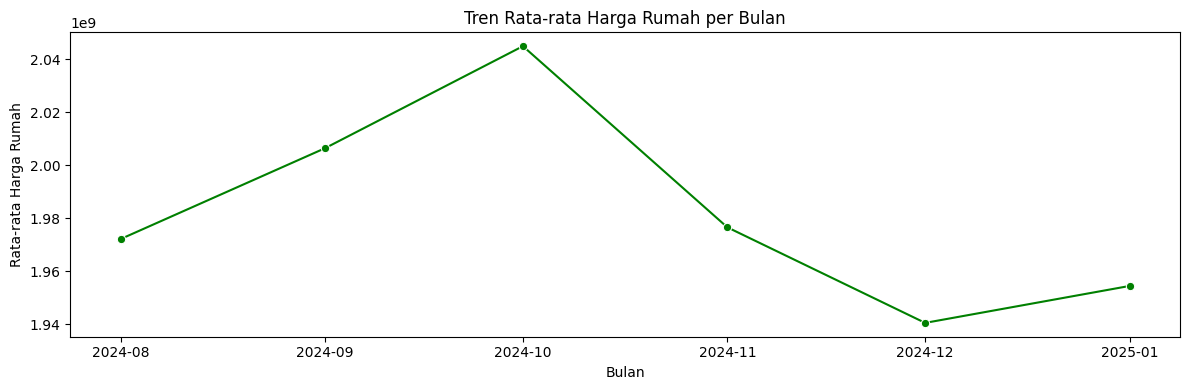

In [16]:
# Tren rata-rata harga rumah

rata2_harga_bulanan = (
    clean_df.groupby(clean_df['waktu_penjualan'].dt.to_period('M'))['harga']
    .mean()
    .reset_index()
)
rata2_harga_bulanan['waktu_penjualan'] = rata2_harga_bulanan['waktu_penjualan'].dt.to_timestamp()

plt.figure(figsize=(12, 4))
sns.lineplot(data=rata2_harga_bulanan, x='waktu_penjualan', y='harga', marker='o', color='green')
plt.title('Tren Rata-rata Harga Rumah per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Harga Rumah')
plt.tight_layout()
plt.show()

#### **Harga Rumah Termahal dan Termurah**

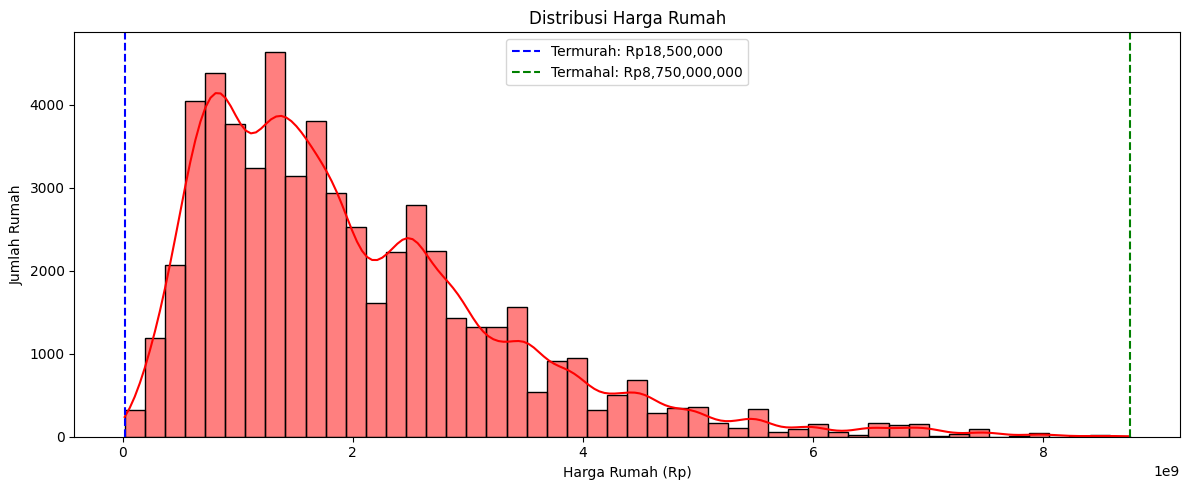

In [17]:
# Distribusi harga rumah

min_price = clean_df['harga'].min()
max_price = clean_df['harga'].max()

plt.figure(figsize=(12, 5))
sns.histplot(clean_df['harga'], bins=50, kde=True, color='red')
plt.axvline(min_price, color='blue', linestyle='--', label=f'Termurah: Rp{min_price:,.0f}')
plt.axvline(max_price, color='green', linestyle='--', label=f'Termahal: Rp{max_price:,.0f}')
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga Rumah (Rp)')
plt.ylabel('Jumlah Rumah')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Melihat jumlah rumah dengan harga yang sama

clean_df.groupby("harga").agg(jumlah=('harga', 'count')).reset_index()

,harga,jumlah
0,1.850000e+07,2
1,1.950000e+07,1
2,2.700000e+07,1
3,2.900000e+07,1
4,3.300000e+07,1
...,...,...
981,8.400000e+09,2
982,8.500000e+09,15
983,8.580000e+09,1
984,8.700000e+09,3


In [19]:
# Melihat detail dari harga rumah terendah

rumah_18500000 = clean_df[clean_df['harga'] == 18500000].reset_index(drop=True)
rumah_18500000

,harga,lokasi,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,waktu_penjualan
0,18500000.0,"Cimahi, Bandung",2,1,1,72,45,2024-09-01
1,18500000.0,"Cihanjuang, Bandung",2,2,1,120,68,2024-09-01


In [20]:
# Melihat latar belakang harga rumah terendah

rumah_termurah = combined_df[combined_df['Price'] == "Rp 18,5 Juta"].reset_index(drop=True)
rumah_termurah

,Unnamed: 0,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building,year-month-sales
0,13906,"Rp 18,5 Juta",Cicilan: 74 Ribuan per bulan,Dikontrakan Rumah Komp Pondok Dustira 10 Menit...,"Cimahi, Bandung",2,1,1,LT : 72 m²,LB : 45 m²,2024-09
1,14950,"Rp 18,5 Juta",Cicilan: 74 Ribuan per bulan,Dikontrakkan Rumah 2 Lantai Di Cihanjuang Deka...,"Cihanjuang, Bandung",2,2,1,LT : 120 m²,LB : 68 m²,2024-09


In [21]:
# Melihat detail dari harga rumah tertinggi

rumah_8750000000 = clean_df[clean_df['harga'] == 8750000000].reset_index(drop=True)
rumah_8750000000

,harga,lokasi,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,waktu_penjualan
0,8.750000e+09,"Bandung Kota, Bandung",5,4,2,321,300,2024-11-01
1,8.750000e+09,"Mekar Wangi, Bandung",3,3,3,244,300,2024-11-01
2,8.750000e+09,"Bandung Kota, Bandung",5,4,2,321,300,2024-12-01


In [22]:
# Melihat persentase dari harga rumah termahal

jumlah_rumah_target = rumah_8750000000.shape[0]
jumlah_total_rumah = clean_df.shape[0]

if jumlah_total_rumah > 0:
    persentase = (jumlah_rumah_target / jumlah_total_rumah) * 100
    print(f"Jumlah rumah dengan harga 8,75 Miliar: {jumlah_rumah_target}")
    print(f"Jumlah total rumah: {jumlah_total_rumah}")
    print(f"Persentase rumah dengan harga 8,75 Miliar terhadap total rumah: {persentase:.3f}%")
else:
    print("Jumlah total rumah adalah nol.")

Jumlah rumah dengan harga 8,75 Miliar: 3
Jumlah total rumah: 57190
Persentase rumah dengan harga 8,75 Miliar terhadap total rumah: 0.005%


#### **Jumlah Rumah Terbanyak dan Tersedikit**

Harga rumah paling banyak: 2,500,000,000 (jumlah: 1717)
Harga rumah paling sedikit: 19,500,000 (jumlah: 1)


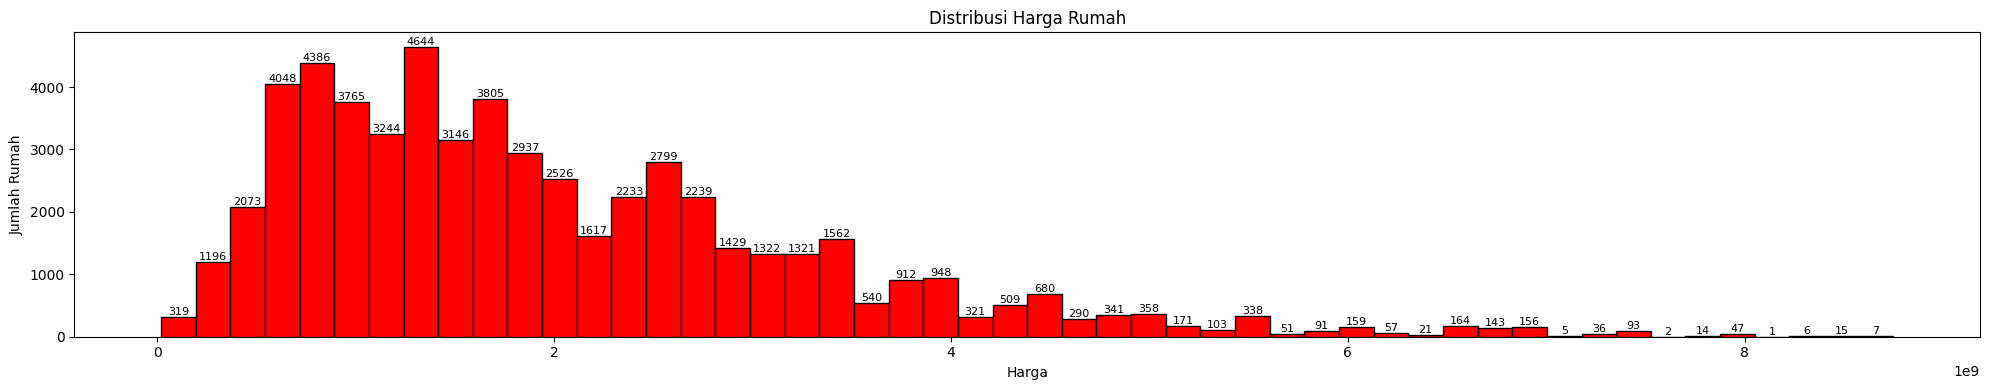

In [23]:
# Distribusi jumlah rumah

harga_counts = clean_df.groupby('harga').size().reset_index(name='jumlah')
jumlah_terbanyak = harga_counts.loc[harga_counts['jumlah'].idxmax()]
jumlah_tersedikit = harga_counts.loc[harga_counts['jumlah'].idxmin()]

print(f"Harga rumah paling banyak: {int(jumlah_terbanyak['harga']):,} (jumlah: {int(jumlah_terbanyak['jumlah'])})")
print(f"Harga rumah paling sedikit: {int(jumlah_tersedikit['harga']):,} (jumlah: {int(jumlah_tersedikit['jumlah'])})")

plt.figure(figsize=(20, 4))
counts, bins, patches = plt.hist(clean_df['harga'], bins=50, color='red', edgecolor='black')
for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(
            x=bin_edge + (bins[1] - bins[0]) / 2,
            y=count,
            s=int(count),
            ha='center',
            va='bottom',
            fontsize=8
        )
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Jumlah Rumah')
plt.tight_layout()
plt.show()

In [24]:
# Melihat jumlah rumah dengan harga yang sama

harga_counts = (
    clean_df.groupby("harga")
    .agg(jumlah=('harga', 'count'))
    .reset_index()
    .sort_values(by=['jumlah', 'harga'], ascending=[False, True])
    .reset_index(drop=True)
)
harga_counts

,harga,jumlah
0,2.500000e+09,1717
1,1.500000e+09,1655
2,1.300000e+09,1308
3,1.100000e+09,1204
4,1.200000e+09,1199
...,...,...
981,7.900000e+09,1
982,7.950000e+09,1
983,8.100000e+09,1
984,8.300000e+09,1


In [25]:
# Melihat detail dari jumlah rumah paling banyak

rumah_2500000000 = clean_df[clean_df['harga'] == 2500000000].reset_index(drop=True)
rumah_2500000000

,harga,lokasi,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,waktu_penjualan
0,2.500000e+09,"Kota Baru Parahyangan, Bandung",4,3,1,198,325,2024-08-01
1,2.500000e+09,"Turangga, Bandung",4,3,2,120,180,2024-08-01
2,2.500000e+09,"Buah Batu, Bandung",4,4,1,213,288,2024-08-01
3,2.500000e+09,"Bandung Utara, Bandung",3,2,1,278,99,2024-08-01
4,2.500000e+09,"Turangga, Bandung",3,2,1,108,135,2024-08-01
...,...,...,...,...,...,...,...,...
1712,2.500000e+09,"Kota Baru Parahyangan, Bandung",3,2,1,108,160,2025-01-01
1713,2.500000e+09,"Kota Baru Parahyangan, Bandung",3,2,1,125,200,2025-01-01
1714,2.500000e+09,"Antapani, Bandung",3,3,0,98,125,2025-01-01
1715,2.500000e+09,"Cigadung, Bandung",3,3,1,200,137,2025-01-01


In [26]:
# Melihat detail dari jumlah rumah paling sedikit

rumah_19500000 = clean_df[clean_df['harga'] == 19500000].reset_index(drop=True)
rumah_19500000

,harga,lokasi,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,waktu_penjualan
0,19500000.0,"Bojongsoang, Bandung",2,1,1,36,50,2025-01-01


#### **Nama Lokasi yang Terdapat di Dataset**

In [27]:
# Melihat nama daerah

daerah = sorted(clean_df['lokasi'].dropna().unique().tolist())

print(f"Jumlah lokasi: {len(daerah)}")
print("Daftar lokasi:")
daerah

Jumlah lokasi: 166
Daftar lokasi:


['Andir, Bandung',
 'Antapani, Bandung',
 'Arcamanik, Bandung',
 'Arjasari, Bandung',
 'Asia Afrika, Bandung',
 'Astanaanyar, Bandung',
 'Awiligar, Bandung',
 'Babakanciparay, Bandung',
 'Baleendah, Bandung',
 'Bandung Barat, Bandung',
 'Bandung Kidul, Bandung',
 'Bandung Kota, Bandung',
 'Bandung Kulon, Bandung',
 'Bandung Selatan, Bandung',
 'Bandung Timur, Bandung',
 'Bandung Utara, Bandung',
 'Bandung Wetan, Bandung',
 'Banjaran, Bandung',
 'Batujajar, Bandung',
 'Batununggal, Bandung',
 'Bkr, Bandung',
 'Bojongloa Kidul, Bandung',
 'Bojongloa, Bandung',
 'Bojongsoang, Bandung',
 'Braga, Bandung',
 'Buah Batu, Bandung',
 'Burangrang, Bandung',
 'Cangkuang, Bandung',
 'Caringin, Bandung',
 'Ciateul, Bandung',
 'Cibaduyut, Bandung',
 'Cibeunying Kidul, Bandung',
 'Cibeunying, Bandung',
 'Cibeureum, Bandung',
 'Cibiru, Bandung',
 'Cibogo, Bandung',
 'Cicadas, Bandung',
 'Cicaheum, Bandung',
 'Cicalengka, Bandung',
 'Cicendo, Bandung',
 'Cidadap, Bandung',
 'Cigadung, Bandung',
 'Cigon

#### **Jumlah Penjualan Rumah Berdasarkan Wilayah (10 Teratas)**

<ipython-input-28-2301017482>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


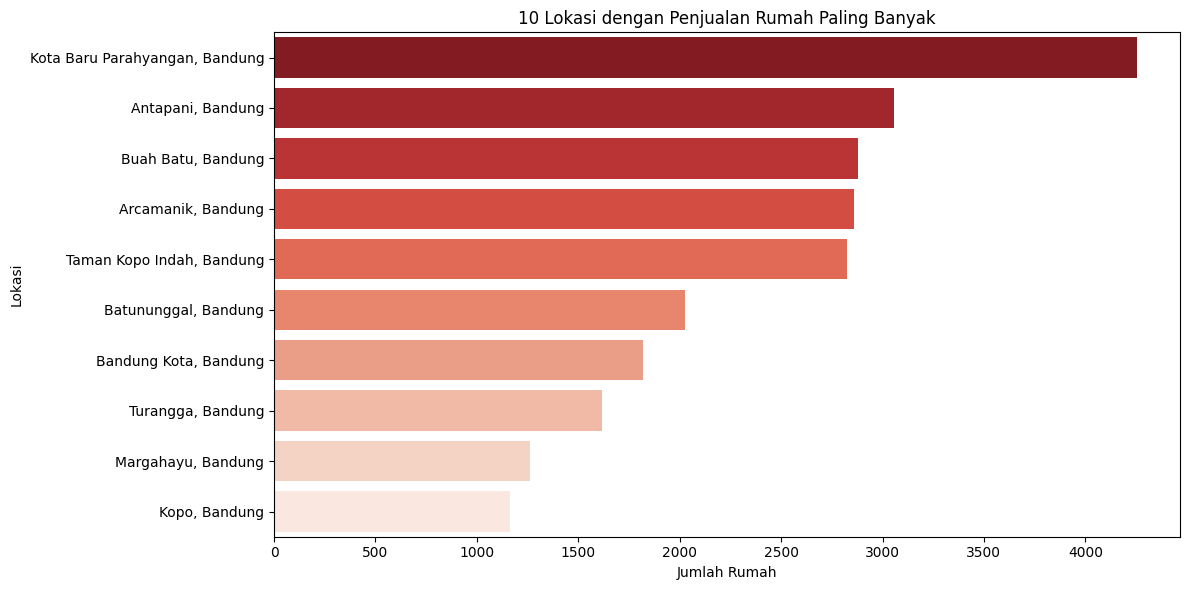

In [28]:
# Melihat lokasi penjualan rumah paling banyak

lokasi_jumlah_teratas = (
    clean_df.groupby('lokasi')
    .agg(jumlah_rumah=('lokasi', 'count'))
    .reset_index()
    .sort_values(by='jumlah_rumah', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=lokasi_jumlah_teratas,
    x='jumlah_rumah',
    y='lokasi',
    orient='h',
    palette='Reds_r'
)
plt.title('10 Lokasi dengan Penjualan Rumah Paling Banyak')
plt.xlabel('Jumlah Rumah')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

In [29]:
# Melihat lokasi penjualan rumah paling banyak

result = (
    clean_df.groupby('lokasi')
    .agg(jumlah_rumah=('harga', 'count'), rata_rata_harga=('harga', 'mean'))
    .sort_values(by='jumlah_rumah', ascending=False)
    .reset_index()
)
result.head(10)

,lokasi,jumlah_rumah,rata_rata_harga
0,"Kota Baru Parahyangan, Bandung",4254,2.937396e+09
1,"Antapani, Bandung",3059,1.674616e+09
2,"Buah Batu, Bandung",2881,1.725684e+09
3,"Arcamanik, Bandung",2858,1.246889e+09
4,"Taman Kopo Indah, Bandung",2823,1.545013e+09
5,"Batununggal, Bandung",2027,3.067107e+09
6,"Bandung Kota, Bandung",1820,1.884786e+09
7,"Turangga, Bandung",1615,2.603425e+09
8,"Margahayu, Bandung",1264,1.230499e+09
9,"Kopo, Bandung",1162,1.317554e+09


#### **Jumlah Penjualan Rumah Berdasarkan Wilayah (10 Terbawah)**

<ipython-input-30-2880370539>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


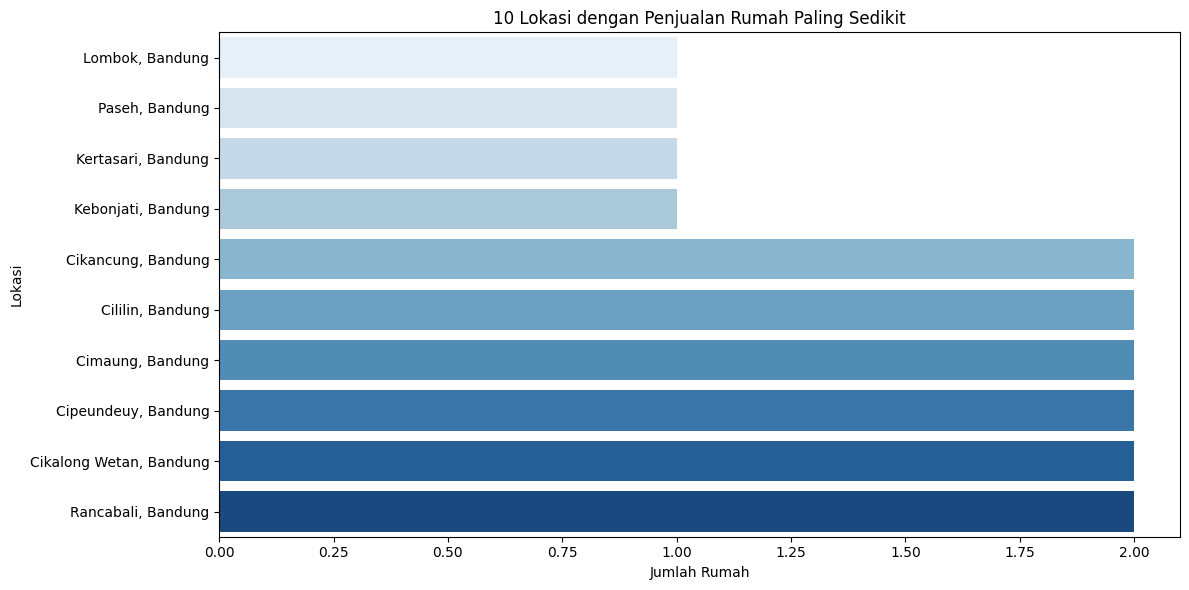

In [30]:
# Melihat lokasi penjualan rumah paling sedikit

lokasi_jumlah_terbawah = (
    clean_df.groupby('lokasi')
    .agg(jumlah_rumah=('lokasi', 'count'))
    .reset_index()
    .sort_values(by='jumlah_rumah', ascending=True)
    .head(10)
)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=lokasi_jumlah_terbawah,
    x='jumlah_rumah',
    y='lokasi',
    orient='h',
    palette='Blues'
)
plt.title('10 Lokasi dengan Penjualan Rumah Paling Sedikit')
plt.xlabel('Jumlah Rumah')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

In [31]:
# Melihat lokasi penjualan rumah paling sedikit

result = (
    clean_df.groupby('lokasi')
    .agg(jumlah_rumah=('harga', 'count'), rata_rata_harga=('harga', 'mean'))
    .sort_values(by='jumlah_rumah', ascending=True)
    .reset_index()
)
result.head(10)

,lokasi,jumlah_rumah,rata_rata_harga
0,"Lombok, Bandung",1,1.900000e+09
1,"Paseh, Bandung",1,3.030000e+09
2,"Kertasari, Bandung",1,1.250000e+09
3,"Kebonjati, Bandung",1,5.500000e+08
4,"Cikancung, Bandung",2,5.000000e+08
5,"Cililin, Bandung",2,4.000000e+08
6,"Cimaung, Bandung",2,3.500000e+08
7,"Cipeundeuy, Bandung",2,2.725000e+09
8,"Cikalong Wetan, Bandung",2,3.750000e+08
9,"Rancabali, Bandung",2,8.340000e+08


#### **Rata-rata Harga Rumah Berdasarkan Wilayah (10 Teratas)**

<ipython-input-32-2182448430>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


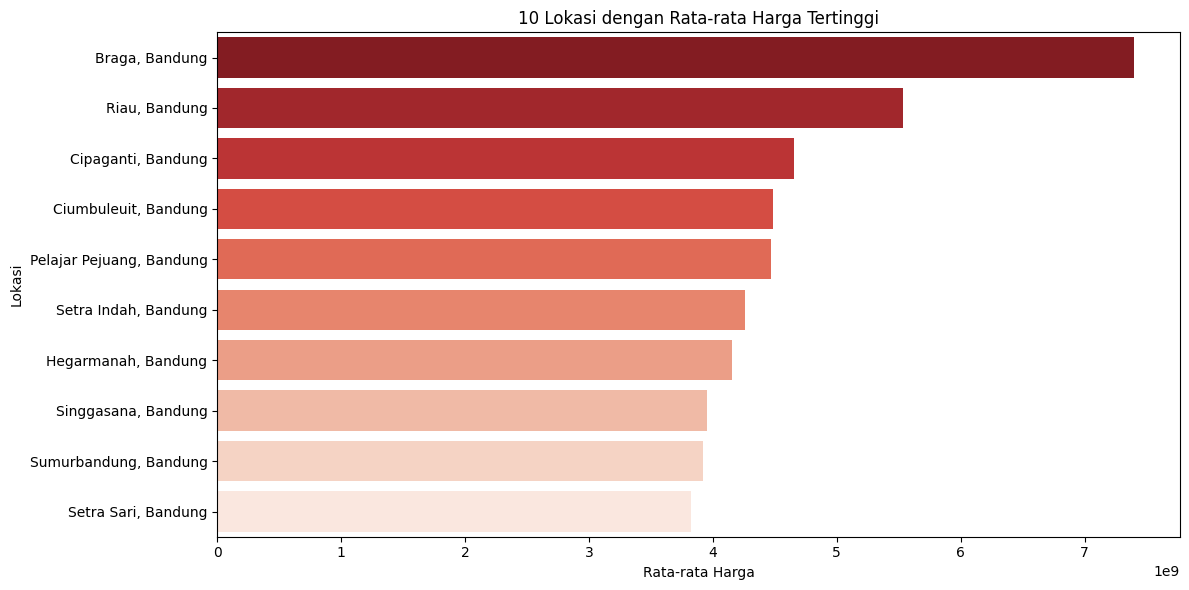

In [32]:
# Melihat lokasi dengan rata-rata harga tertinggi

lokasi_mean_teratas = (
    clean_df.groupby('lokasi')
    .agg(rata_rata_harga=('harga', 'mean'))
    .reset_index()
    .sort_values(by='rata_rata_harga', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=lokasi_mean_teratas,
    y='lokasi',
    x='rata_rata_harga',
    dodge=False,
    palette='Reds_r'
)
plt.title('10 Lokasi dengan Rata-rata Harga Tertinggi')
plt.xlabel('Rata-rata Harga')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

In [33]:
# Melihat lokasi dengan rata-rata harga tertinggi

result = (
    clean_df.groupby('lokasi')
    .agg(rata_rata_harga=('harga', 'mean'), jumlah_rumah=('harga', 'count'))
    .sort_values(by='rata_rata_harga', ascending=False)
    .reset_index()
)
result.head(10)

,lokasi,rata_rata_harga,jumlah_rumah
0,"Braga, Bandung",7.400000e+09,14
1,"Riau, Bandung",5.531839e+09,87
2,"Cipaganti, Bandung",4.656923e+09,39
3,"Ciumbuleuit, Bandung",4.486341e+09,123
4,"Pelajar Pejuang, Bandung",4.465000e+09,10
5,"Setra Indah, Bandung",4.258000e+09,15
6,"Hegarmanah, Bandung",4.150500e+09,20
7,"Singgasana, Bandung",3.948860e+09,307
8,"Sumurbandung, Bandung",3.919208e+09,24
9,"Setra Sari, Bandung",3.822960e+09,201


#### **Rata-rata Harga Rumah Berdasarkan Wilayah (10 Terbawah)**

<ipython-input-34-4151467819>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


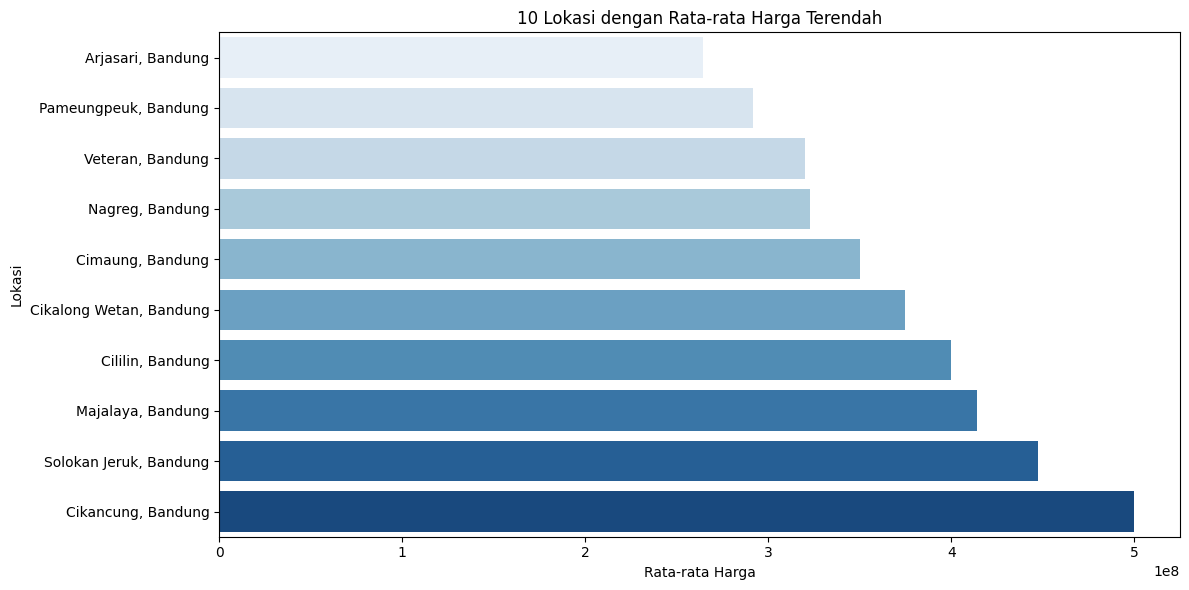

In [34]:
# Melihat lokasi dengan rata-rata harga terendah

lokasi_mean_terendah = (
    clean_df.groupby('lokasi')
    .agg(rata_rata_harga=('harga', 'mean'))
    .reset_index()
    .sort_values(by='rata_rata_harga', ascending=True)
    .head(10)
)

plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=lokasi_mean_terendah,
    y='lokasi',
    x='rata_rata_harga',
    orient='h',
    palette='Blues'
)
plt.title('10 Lokasi dengan Rata-rata Harga Terendah')
plt.xlabel('Rata-rata Harga')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

In [35]:
# Melihat lokasi dengan rata-rata harga terendah

result = (
    clean_df.groupby('lokasi')
    .agg(rata_rata_harga=('harga', 'mean'), jumlah_rumah=('harga', 'count'))
    .sort_values(by='rata_rata_harga', ascending=True)
    .reset_index()
)
result.head(10)

,lokasi,rata_rata_harga,jumlah_rumah
0,"Arjasari, Bandung",2.641379e+08,29
1,"Pameungpeuk, Bandung",2.918000e+08,30
2,"Veteran, Bandung",3.203333e+08,3
3,"Nagreg, Bandung",3.227273e+08,11
4,"Cimaung, Bandung",3.500000e+08,2
5,"Cikalong Wetan, Bandung",3.750000e+08,2
6,"Cililin, Bandung",4.000000e+08,2
7,"Majalaya, Bandung",4.142000e+08,10
8,"Solokan Jeruk, Bandung",4.476000e+08,5
9,"Cikancung, Bandung",5.000000e+08,2


#### **Matriks Korelasi**

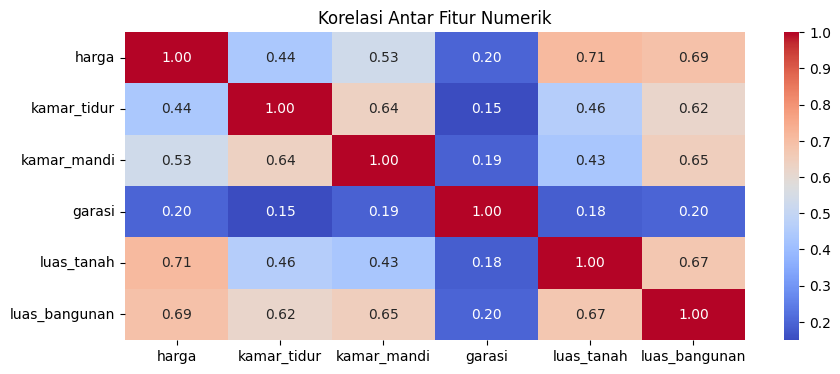

In [36]:
# Korelasi antar fitur numerik

plt.figure(figsize=(10, 4))
sns.heatmap(clean_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [37]:
# Korelasi dengan harga

numerical_df = clean_df.select_dtypes(include=['int64', 'float64'])
harga_corr = numerical_df.corr()['harga'].drop('harga').sort_values(ascending=False)

print("Korelasi harga dengan variabel lainnya:")
print(harga_corr)

Korelasi harga dengan variabel lainnya:
luas_tanah       0.709160
luas_bangunan    0.688515
kamar_mandi      0.532527
kamar_tidur      0.436797
garasi           0.196251
Name: harga, dtype: float64


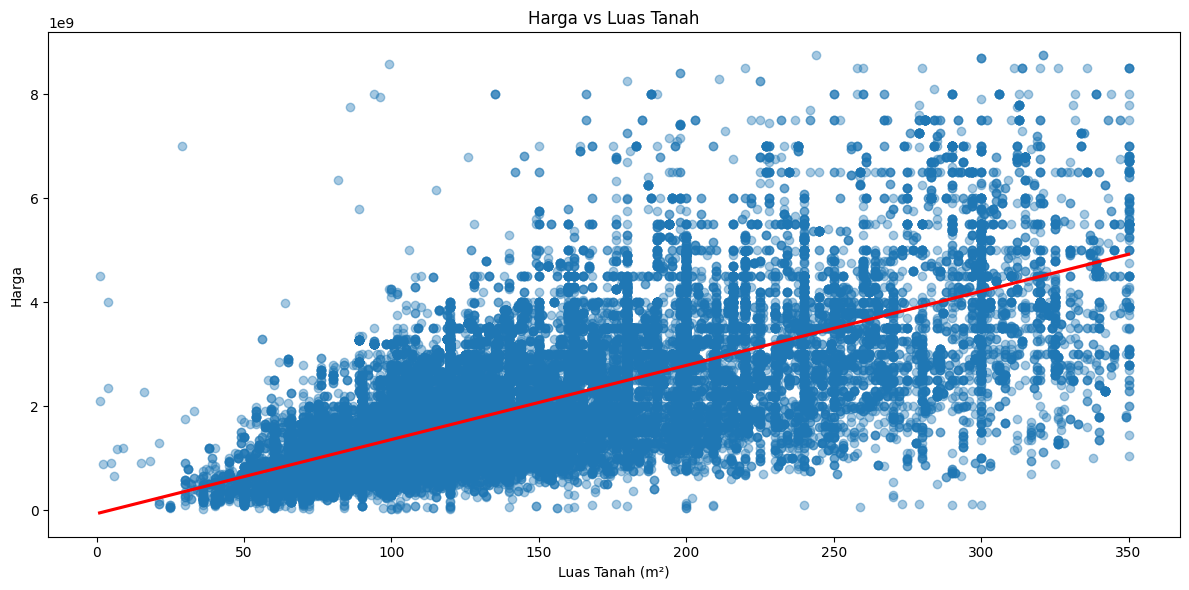

In [38]:
# Grafik harga dengan luas tanah

plt.figure(figsize=(12, 6))
sns.regplot(
    data=clean_df,
    x='luas_tanah',
    y='harga',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Harga vs Luas Tanah')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

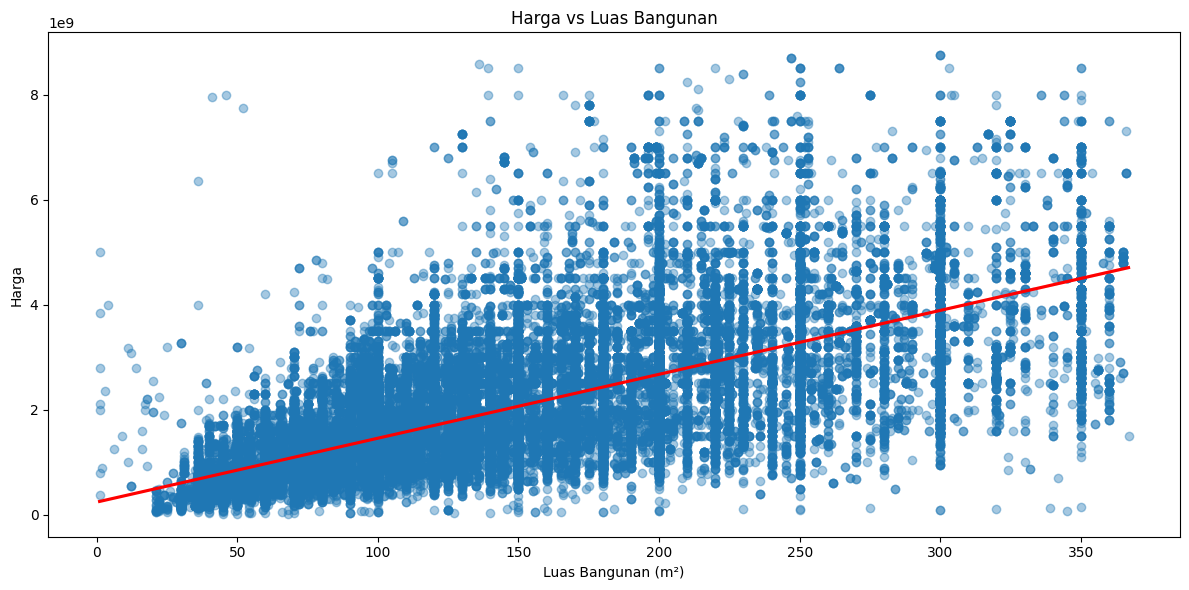

In [39]:
# Grafik harga dengan luas bangunan

plt.figure(figsize=(12, 6))
sns.regplot(
    data=clean_df,
    x='luas_bangunan',
    y='harga',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Harga vs Luas Bangunan')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

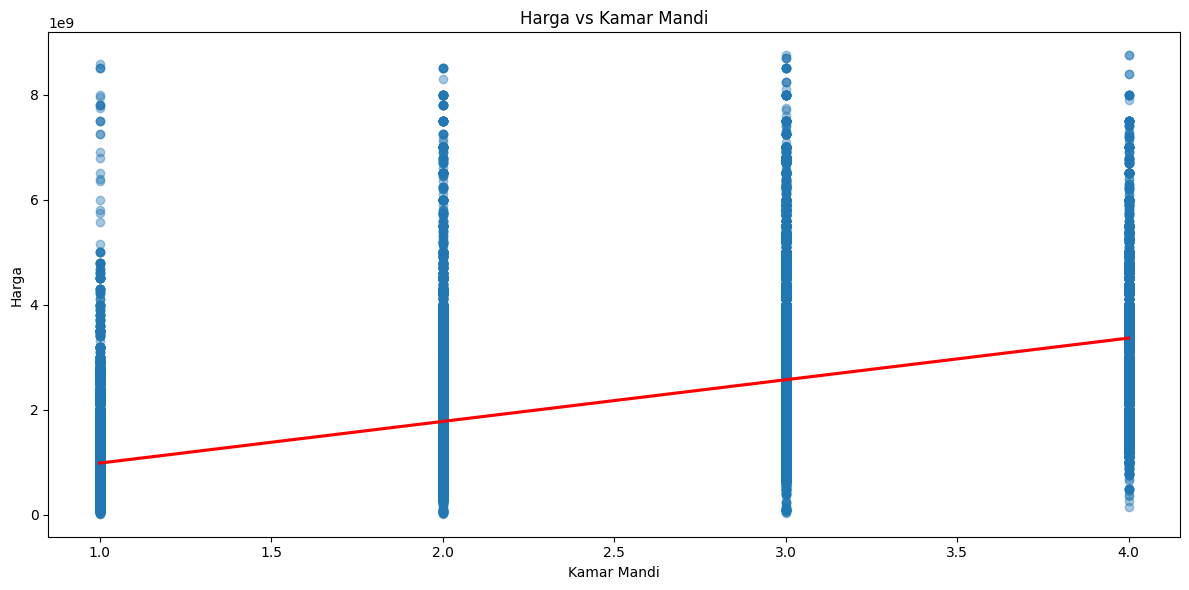

In [40]:
# Grafik harga dengan kamar mandi

plt.figure(figsize=(12, 6))
sns.regplot(
    data=clean_df,
    x='kamar_mandi',
    y='harga',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Harga vs Kamar Mandi')
plt.xlabel('Kamar Mandi')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

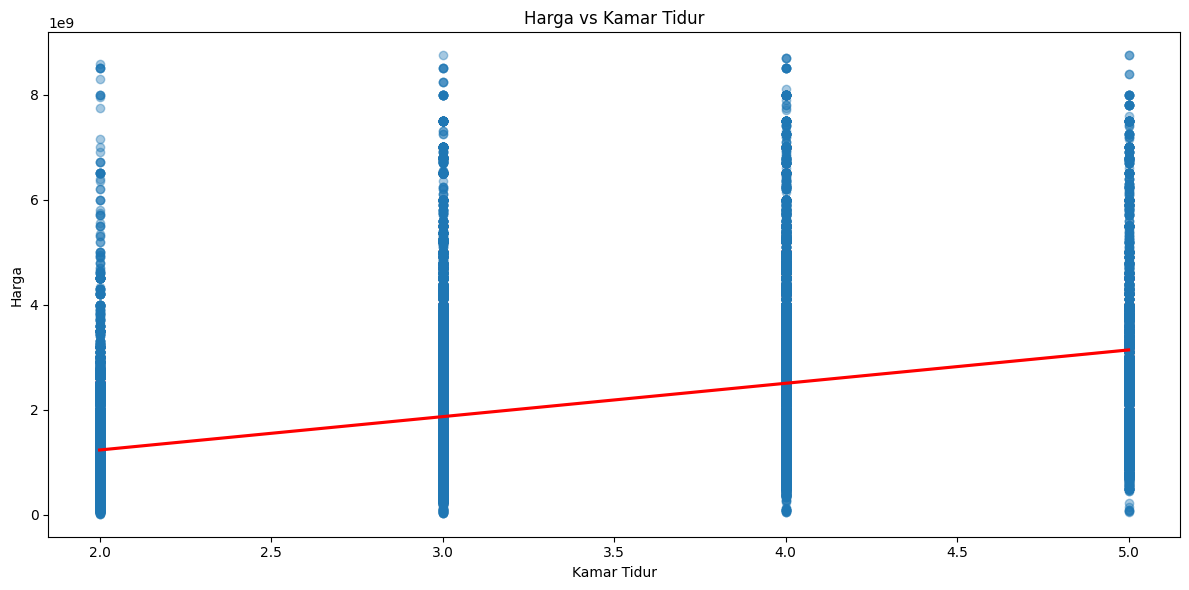

In [41]:
# Grafik harga dengan kamar tidur

plt.figure(figsize=(12, 6))
sns.regplot(
    data=clean_df,
    x='kamar_tidur',
    y='harga',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Harga vs Kamar Tidur')
plt.xlabel('Kamar Tidur')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

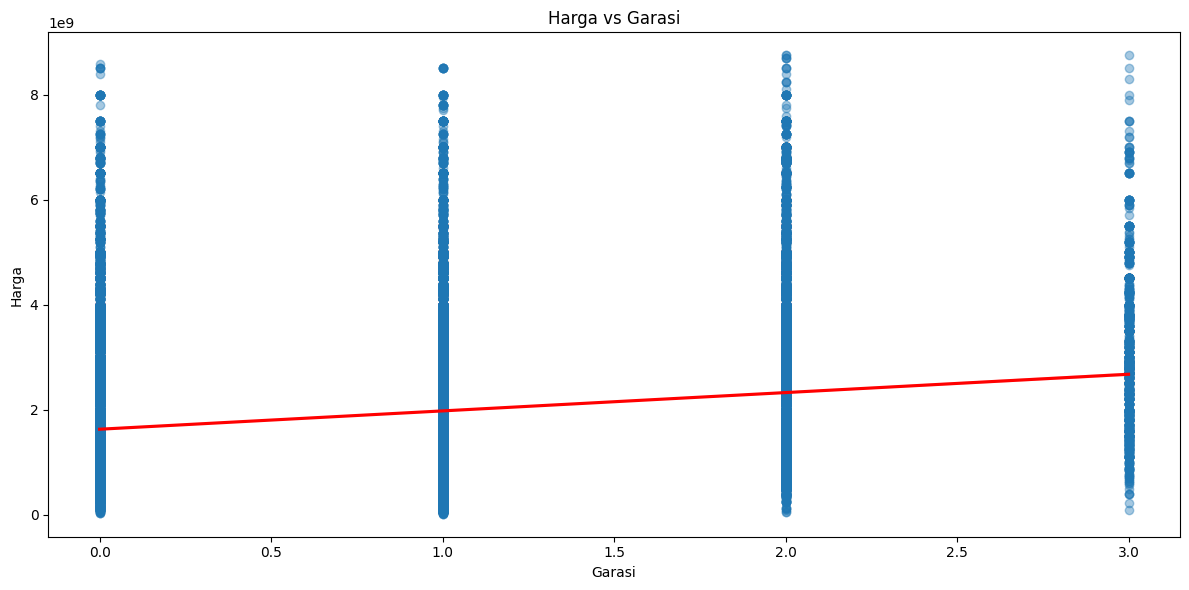

In [42]:
# Grafik harga dengan garasi

plt.figure(figsize=(12, 6))
sns.regplot(
    data=clean_df,
    x='garasi',
    y='harga',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Harga vs Garasi')
plt.xlabel('Garasi')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

## **MULTIPLE LINEAR REGRESSION**

### **Modeling**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
# Pembagian variabel x dan y

X = clean_df.drop('harga', axis=1)
y = clean_df['harga']

In [45]:
# One-hot encoding lokasi dan waktu penjualan

X = pd.get_dummies(X, columns=['lokasi'], drop_first=True)

X['waktu_penjualan'] = X['waktu_penjualan'].astype(str)
X = pd.get_dummies(X, columns=['waktu_penjualan'], drop_first=True)

In [46]:
# Split data latih dan uji

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [47]:
# Scaling fitur

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Latih model

model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
# Prediksi model

y_pred = model_linear.predict(X_test_scaled)

### **Evaluation**

MAE  (Mean Absolute Error): 463,006,951.84
MSE  (Mean Squared Error): 443,728,571,186,526,016.00
RMSE (Root Mean Squared Error): 666,129,545.35
R²   (R-squared): 0.7347391933771696
MAPE (Mean Absolute Percentage Error): 33.41658200465601%


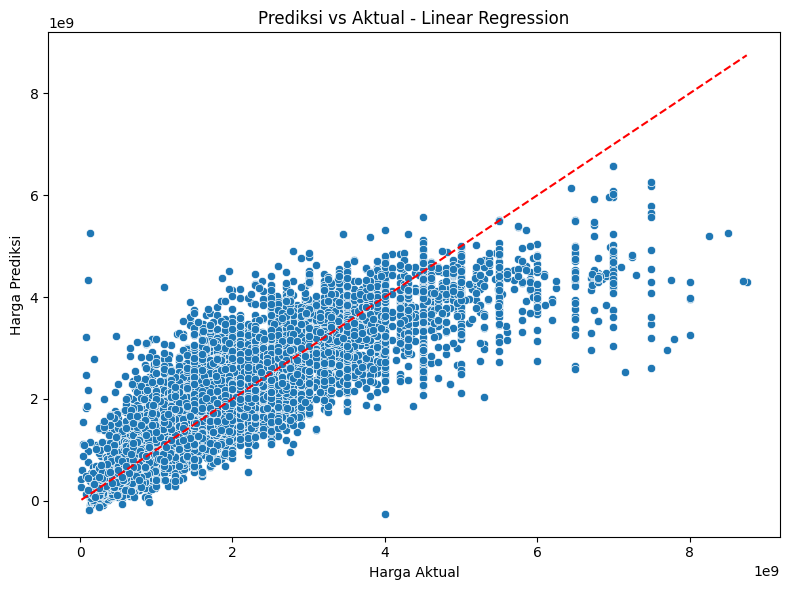

In [50]:
# Evaluasi model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE  (Mean Absolute Error): {mae:,.2f}")
print(f"MSE  (Mean Squared Error): {mse:,.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"R²   (R-squared): {r2}")
print(f"MAPE (Mean Absolute Percentage Error): {mape}%")

# Visualisasi model

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Prediksi vs Aktual - Linear Regression')
plt.tight_layout()
plt.show()

### **Testing**

#### **Input Data Baru**

In [51]:
# Tambah data baru

data = {
    'kamar_tidur': 2,
    'kamar_mandi': 2,
    'garasi': 1,
    'luas_tanah': 80,
    'luas_bangunan': 50,
    'lokasi': 'Braga, Bandung',
    'waktu_penjualan': '2025-04'
}

# Konversi data baru

data = pd.DataFrame([data])

In [52]:
# One-hot encoding data baru

data['waktu_penjualan'] = data['waktu_penjualan'].astype(str)
data_encoded = pd.get_dummies(data, columns=['lokasi', 'waktu_penjualan'], drop_first=True)

In [53]:
# Tambah kolom

missing_cols = list(set(X_train.columns) - set(data_encoded.columns))
if missing_cols:
    missing_df = pd.DataFrame(0, index=data_encoded.index, columns=missing_cols)
    data_encoded = pd.concat([data_encoded, missing_df], axis=1)

In [54]:
# Cek kolom sesuai dengan data latih

data_encoded = data_encoded[X_train.columns]

In [55]:
# Scaling data

data_scaled = scaler.transform(data_encoded)

In [56]:
# Hasil prediksi

prediksi_harga = model_linear.predict(data_scaled)
print(f"Prediksi Harga Rumah: Rp {int(prediksi_harga[0]):,}")

Prediksi Harga Rumah: Rp 1,218,018,873


## **EXTREME GRADIENT BOOSTING (XGBOOST)**

### **Modeling**

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import uniform, randint
from prophet import Prophet

In [58]:
# Pembagian variabel x dan y

X = clean_df.drop('harga', axis=1)
y = clean_df['harga']

In [59]:
# One-hot encoding lokasi dan waktu penjualan

X = pd.get_dummies(X, columns=['lokasi'], drop_first=True)

X['waktu_penjualan'] = X['waktu_penjualan'].astype(str)
X = pd.get_dummies(X, columns=['waktu_penjualan'], drop_first=True)

In [60]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Inisialisasi model

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

In [62]:
# Parameter yang digunakan

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.3),
    'min_child_weight': randint(1, 10)
}

In [63]:
# Latih model menggunakan Randomized SearchCV

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Hasil parameter terbaik

print("Best parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'colsample_bytree': np.float64(0.9222921582732004), 'gamma': np.float64(0.2301584559325715), 'learning_rate': np.float64(0.17455807037533866), 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 486, 'subsample': np.float64(0.8750106295291479)}


In [64]:
# Prediksi model

model_xgb = random_search.best_estimator_
y_pred = model_xgb.predict(X_test)

### **Evaluation**

MAE  (Mean Absolute Error): 275,836,390.55
MSE  (Mean Squared Error): 216,969,936,850,329,728.00
RMSE (Root Mean Squared Error): 465,800,318.65
R²   (R-squared): 0.8721521361970213
MAPE (Mean Absolute Percentage Error): 21.47557004958946%


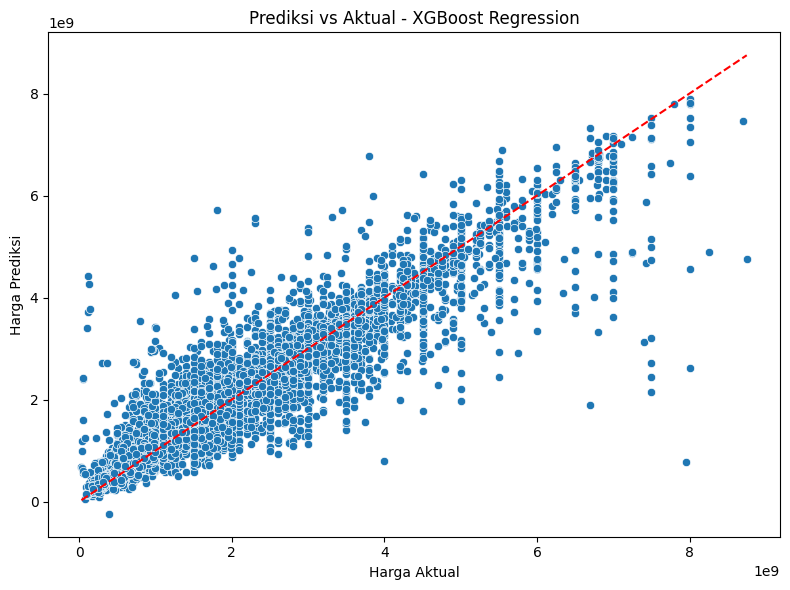

In [65]:
# Evaluasi model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE  (Mean Absolute Error): {mae:,.2f}")
print(f"MSE  (Mean Squared Error): {mse:,.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"R²   (R-squared): {r2}")
print(f"MAPE (Mean Absolute Percentage Error): {mape}%")

# Visualisasi model

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Prediksi vs Aktual - XGBoost Regression')
plt.tight_layout()
plt.show()

### **Testing**

#### **Forecasting Harga Masa Depan**

In [66]:
# Ambil kolom waktu penjualan

prophet_df = clean_df.groupby(clean_df['waktu_penjualan'].dt.to_period('M'))['harga'].mean().reset_index()
prophet_df['waktu_penjualan'] = prophet_df['waktu_penjualan'].dt.to_timestamp()
prophet_df.rename(columns={'waktu_penjualan': 'ds', 'harga': 'y'}, inplace=True)

In [67]:
# Fit model Prophet

model_ts = Prophet()
model_ts.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf6woupqx/pa485lmt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf6woupqx/q8tbrdf6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66401', 'data', 'file=/tmp/tmpf6woupqx/pa485lmt.json', 'init=/tmp/tmpf6woupqx/q8tbrdf6.json', 'output', 'file=/tmp/tmpf6woupqx/prophet_modeltt_1wgij/prophet_model-20250616003456.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:34:56 - cmdstanpy - INFO - Chain [1] start processing
IN

In [68]:
# Forecast selama 12 bulan ke depan

future = model_ts.make_future_dataframe(periods=12, freq='M')
forecast = model_ts.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


           ds          yhat    yhat_lower    yhat_upper
6  2025-01-31  1.913260e+09  1.888162e+09  1.936428e+09
7  2025-02-28  1.889484e+09  1.857323e+09  1.925647e+09
8  2025-03-31  1.863160e+09  1.808059e+09  1.916501e+09
9  2025-04-30  1.837685e+09  1.749270e+09  1.919763e+09
10 2025-05-31  1.811362e+09  1.686533e+09  1.919572e+09
11 2025-06-30  1.785887e+09  1.615606e+09  1.937455e+09
12 2025-07-31  1.759563e+09  1.540077e+09  1.945826e+09
13 2025-08-31  1.733240e+09  1.466290e+09  1.965676e+09
14 2025-09-30  1.707765e+09  1.390623e+09  1.986802e+09
15 2025-10-31  1.681441e+09  1.305151e+09  1.999425e+09
16 2025-11-30  1.655966e+09  1.226295e+09  2.016887e+09
17 2025-12-31  1.629643e+09  1.144788e+09  2.051355e+09


#### **Input Data Baru**

In [69]:
# Tambah data baru

data = {
    'kamar_tidur': 10,
    'kamar_mandi': 4,
    'garasi': 3,
    'luas_tanah': 315,
    'luas_bangunan': 300,
    'lokasi': 'Braga, Bandung',
    'waktu_penjualan': '2025-06'
}

In [70]:
# One-hot encoding data baru

data = pd.DataFrame([data])
data['waktu_penjualan'] = data['waktu_penjualan'].astype(str)
data_encoded = pd.get_dummies(data, columns=['lokasi', 'waktu_penjualan'], drop_first=True)

In [71]:
# Tambah kolom

missing_cols = list(set(X_train.columns) - set(data_encoded.columns))
if missing_cols:
    missing_df = pd.DataFrame(0, index=data_encoded.index, columns=missing_cols)
    data_encoded = pd.concat([data_encoded, missing_df], axis=1)

In [72]:
# Cek kolom sesuai dengan data latih

data_encoded = data_encoded[X_train.columns]

In [73]:
# Hasil prediksi

prediksi_harga = model_xgb.predict(data_encoded)
print(f"Prediksi Harga Rumah: Rp {int(prediksi_harga[0]):,}")

Prediksi Harga Rumah: Rp 4,502,491,136


## **DEPLOYMENT**

In [74]:
# Simpan dataset yang sudah bersih

clean_df.to_csv("clean_df.csv", index=False)

In [79]:
# Deploy model dengan pickle

import joblib

joblib.dump(model_xgb, 'model_xgboost.pkl')
joblib.dump(X_train.columns.tolist(), 'fitur_model.pkl')

['fitur_model.pkl']